# Change of Measure,Convexity and Linear Rate Model

Wolfram Boenkost, Wolfgang M. Schmidt: Notes on convexity and quanto adjustments for interest rates and related options 
https://d-nb.info/989681769/34


In [10]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats
from scipy.interpolate import interp1d
import math
import scipy.integrate as integrate
from scipy.stats import norm
from scipy.stats import lognorm
% matplotlib inline

UsageError: Line magic function `%` not found.


# Model free part

## Tradable Securities

- Zerobonds  $P(t,T_i)$ where $t < T_0 < ... < T_n$ 

- Annuity factor $PV01(t,T_0,T_n) = \sum_{i=1}^n \Delta_i P(t,T_i)$   where $\Delta_i = T_i -T_{i-1}$ 


In [8]:
def ccrate(t,T):
    return 0.04879018

def P(t,T):
    delta = T-t
    if delta <=0:
        return 1.0
    return math.exp(-ccrate(t,T)*delta)

def PV01(t,schedule):
    retVal=0
    for i in np.arange(1,len(schedule),1):
        delta = schedule[i] - schedule[i-1] 
        retVal += delta * P(t,schedule[i])
    return retVal

def C(t,schedule):
    floatLeg = P(0,schedule[0])-P(0,schedule[len(schedule)-1]) # single curve
    return floatLeg/PV01(t,schedule)


Choose annuity factor as numeraire and $Q_{Swap}$ such that  $\frac{P(t,T)}{PV01(t,T_0,T_n)}$ is $Q_{Swap}$-Martingale $t<T_0$

- Par rate of a swap $C(t,T_0,T_n)=\frac{P(t,T_0) - P(t,T_n)}{PV01(t,T_0,T_n)}$ is $ Q_{Swap}$-Martingale

- Under $Q_{Swap}$ the expectation of the (future) par rate is the forward par rate

$E^{Q_{Swap}}( C(T_0,T_0,T_n)|\mathcal{F_t})=E^{Q_{Swap}}(\frac{P(T_0,T_0) - P(T_0,T_n)}{PV01(T_0,T_0,T_n)}| \mathcal{F_t})= \frac{P(t,T_0) - P(t,T_n)}{PV01(t,T_0,T_n)} = C(t,T_0,T_n)$



## Payoff CMS-Floater
$X = \Delta C(T_0,T_0,T_n)$ paid @ time p  where $t<T_0<=p$
- $ V_t(X) =V_t(\Delta C(T_0,T_0,T_n)@ p) = P(t,p) E^{Q_p}(\Delta C(T_0,T_0,T_n)  @ p|\mathcal{F_t})$ 
- where $Q_p$ is p-Forward measure   i.e. such that $\frac{P(t,T)}{P(t,p)} Q_p$-Martingale $t<T<p$

## Problem: distribution of X under $Q_p$ is unknown, but known under $Q_{swap}$





#### Measure transformation between $Q_{p}$ and $Q_{Swap}$

$ M(t,T_0,T_n)=\left. \frac{dQ_{Swap}}{dQ_p}\right|_{t}=E^{Q_{Swap}}(\frac{P(T_0,p)}{PV01(T_0,T_0,T_n)}|\mathcal{F_t}) = \frac{P(t,p)}{PV01(t,T_0,T_n)} $ is a $Q_{Swap}$-Matringale (Radon-Nykodym)



## Assume linear rate model


$ M(t,T_0,T_n)=\left. \frac{dQ_{Swap}}{dQ_p}\right|_{t} = \frac{P(t,p)}{PV01(t,T_0,T_n)}= \alpha + \beta_p C(t,T_0,T_n)$

- $\beta_p$ such that $\frac{P(.,T)}{PV01(.,T_0,T_n)}$ is $Q_{swap}$-Martingale
- $\alpha$ such that $1=\frac{\sum_{i=1}^n \Delta_i P(t,T_i)}{PV01_{T_0}}$





$E^{Q_{p}}(C(T_0,T_0,T_n)|\mathcal{F_t})=  \frac{1}{M(t)} E^{Q_{Swap}}(M(T_0) C(T_0,T_0,T_n)|\mathcal{F_t}) = \frac{1}{\alpha +\beta_p C(t,T_0,T_n)}
E^{Q_{Swap}}(C(T_0,T_0,T_n)  (\alpha +\beta_p C(T_0,T_0,T_n)|\mathcal{F_t})
=\frac{1}{\alpha +\beta_p C(t,T_0,T_n)}(
\alpha  E^{Q_{Swap}}(C(T_0,T_0,T_n)|\mathcal{F_t}) + \beta_p (E^{Q_{Swap}} C(T_0,T_0,T_n)^2|\mathcal{F_t}))
=\frac{1}{\alpha +\beta_p C(t,T_0,T_n)}(
\alpha  C(t,T_0,T_n) + \beta_p (Var^{Q_{Swap}} (C(T_0,T_0,T_n)|\mathcal{F_t})+ C(t,T_0,T_n)^2)
=\frac{1}{\alpha +\beta_p C(t,T_0,T_n)}(
(\alpha  + \beta_p C(t,T_0,T_n))C(t,T_0,T_n) + \beta_p (Var^{Q_{Swap}} (C(T_0,T_0,T_n)|\mathcal{F_t})$

$=C(t,T_0,T_n) + \frac{\beta_p Var^{Q_{Swap}}(C(T_0,T_0,T_n)|\mathcal{F_t})}{\alpha +\beta_p C(t,T_0,T_n)}=C(t,T_0,T_n)( 1 + \frac{\beta_p Var^{Q_{Swap}}(C(T_0,T_0,T_n)|\mathcal{F_t})}{C(t,T_0,T_n)(\alpha +\beta_p C(t,T_0,T_n))})$




In [9]:
def alpha(schedule):
    deltas = schedule[1:] - schedule[:len(schedule)-1]
    return 1.0/deltas.sum()





def beta(t,schedule,p):
    return (P(t,schedule[0]+ p)/PV01(t,schedule) - alpha(schedule))/C(t,schedule)


####  Black

$C(T_0,T_0,T_n) = C(0,T_0,T_n) exp(-\frac{\sigma^2}{2}T_1+\sigma W_{T_1})$
- $ Var^{Q_{Swap}}(C(T_0,T_0,T_n)) = C(0,T_0,T_n)^2 (exp( \sigma^2 T_0)-1)$
- $E^{Q_{p}}(C(T_0,T_0,T_n)|\mathcal{F_0})= C(0,T_0,T_n)( 1 + \frac{\beta_p C(0,T_0,T_n) (exp( \sigma^2 T_0)-1)}{(\alpha +\beta_p C(0,T_0,T_n))})$



#### Expectation Bachelier

$C(T_0,T_0,T_n) = C(0,T_0,T_n) \sigma W_{T_0}$
- $ Var^{Q_{Swap}}(C(T_0,T_0,T_n)) = C(0,T_0,T_n)^2 (\sigma^2 T_0-1)$
- $E^{Q_{p}}(C(T_0,T_0,T_n)|\mathcal{F_0})= C(0,T_0,T_n)( 1 + \frac{\beta_p C(0,T_0,T_n) ( \sigma^2 T_0-1)}{(\alpha +\beta_p C(0,T_0,T_n))})$



In [2]:

SwapFrequency =1
p=1
sigma =0.2


    


In [3]:
def ForwardAdjusted(today,schedule,p,sigma):    
    fixingTime =schedule[0]
    maturityTime =schedule[len(schedule)-1]
    num =  C(today,schedule) *  ( alpha(schedule) + C(today,schedule) * beta(today,schedule,p))
    #print("num:" + str(num))
    #print("schedule:" + str(schedule))
    denom = beta(today,schedule,p)    
    #print("denom:" + str(denom))
    varianz = C(today,schedule)*C(today,schedule) * (math.exp(sigma*sigma * fixingTime)-1)
    #print("varianz:" + str(varianz))
    return C(today,schedule) * (1 + denom/num * varianz)


for cmsTenor in [1,2,3,4,5,6,7,8,9,10]:
    msg=""
    for swapTenor in  [5,10,20]:
        schedule = np.arange(cmsTenor, cmsTenor + swapTenor+ SwapFrequency,SwapFrequency)
        pv01 = PV01(0,schedule)
        forward = C(0,schedule)
        forwardAdjusted = ForwardAdjusted(0,schedule,p,sigma)
        msg = msg + '|' + str(round(forwardAdjusted*100,3))
    print(msg)


|5.019|5.039|5.071
|5.038|5.079|5.144
|5.058|5.121|5.22
|5.079|5.164|5.3
|5.101|5.209|5.383
|5.123|5.257|5.469
|5.147|5.306|5.559
|5.171|5.357|5.652
|5.197|5.41|5.749
|5.223|5.465|5.85


In [4]:
xrange = np.arange(0,30,1)

plt.plot(xrange,[ForwardAdjusted(0,np.arange(time,time + SwapTenor+ SwapFrequency,SwapFrequency),p,0.2) for time in xrange],label="sigma=0.2")
plt.plot(xrange,[ForwardAdjusted(0,np.arange(time,time + SwapTenor+ SwapFrequency,SwapFrequency),p,0.15) for time in xrange],label="sigma=0.15")
plt.plot(xrange,[ForwardAdjusted(0,np.arange(time,time + SwapTenor+ SwapFrequency,SwapFrequency),p,0.1) for time in xrange],label="sigma=0.1")
plt.plot(xrange,[C(0,np.arange(time,time + SwapTenor+ SwapFrequency,SwapFrequency)) for time in xrange],label="sigma=0")
plt.show()


NameError: name 'SwapTenor' is not defined

### Calculate the RN-derivative by orthogonal projection

$(\frac{M(T_0,T_0,T_n)}{M(t,T_0,T_n)}-\alpha_0(t,T_0,T_n) - \alpha_1(t,T_0,T_n) C(T_0,T_0,T_n)) \bot span\{1,C(T_0,T_0,T_n)\}$



$\left(\begin{matrix} 0\\0 \end{matrix}\right) =E^{Q_{Swap}}(\left(\begin{matrix}1 & 0\\0 &C(T_0,T_0,T_n)\end{matrix}\right)\left(\begin{matrix} \frac{M(T_0,T_0,T_n)}{M(t,T_0,T_n)}-\alpha_0(t,T_0,T_n) - \alpha_1(t,T_0,T_n) C(T_0,T_0,T_n)\\\frac{M(T_0,T_0,T_n)}{M(t,T_0,T_n)}-\alpha_0(t,T_0,T_n) - \alpha_1(t,T_0,T_n) C(T_0,T_0,T_n) \end{matrix}\right)|\mathcal{F_t})$

$\left(\begin{matrix} 0\\0 \end{matrix}\right) =\left(\begin{matrix} E^{Q_{Swap}}(\frac{M(T_0,T_0,T_n)}{M(t,T_0,T_n)}|\mathcal{F_t})-\alpha_0(t,T_0,T_n)- \alpha_1(t,T_0,T_n)C(t,T_0,T_n)\\E^{Q_{Swap}}(\frac{M(T_0,T_0,T_n)}{M(t,T_0,T_n)} C(T_0,T_0,T_n)|\mathcal{F_t})- \alpha_0(t,T_0,T_n) C(t,T_0,T_n) - \alpha_1(t,T_0,T_n) E^{Q_{Swap}}( C(T_0,T_0,T_n)^2|\mathcal{F_t}) \end{matrix}\right)$

### Solve for $\alpha_1,\alpha_2$

$\left(\begin{matrix} 1\\E^{Q_{Swap}}(\frac{M(T_0,T_0,T_n)}{M(t,T_0,T_n)}C(T_0,T_0,T_n)|\mathcal{F_t}) \end{matrix}\right) =\left(\begin{matrix} 1 & C(t,T_0,T_n)\\C(t,T_0,T_n) & E^{Q_{T_2}}(L(T_1,T_2)^2|\mathcal{F_t}) \end{matrix}\right) \left(\begin{matrix} \alpha_0(t,T_0,T_n)\\\alpha_1(t,T_0,T_n) \end{matrix}\right)$

$\left(\begin{matrix} \alpha_0(t,T_0,T_n)\\\alpha_1(t,T_0,T_n) \end{matrix}\right) = \left(\begin{matrix} 1 & C(t,T_0,T_n)\\C(t,T_0,T_n) & E^{Q_{T_2}}(C(T_0,T_0,T_n)^2|\mathcal{F_t}) \end{matrix}\right)^{-1} \left(\begin{matrix} 1\\E^{Q_{Swap}}(\frac{M(T_0,T_0,T_n)}{M(t,T_0,T_n)}C(T_0,T_0,T_n)|\mathcal{F_t}) \end{matrix}\right)$

$\left(\begin{matrix} \alpha_0(t,T_0,T_n)\\\alpha_1(t,T_0,T_n) \end{matrix}\right) =\frac{1}{Var^{Q_{Swap}}(C(T_0,T_0,T_n)|\mathcal{F_t})} \left(\begin{matrix} E^{Q_{T_2}}(C(T_0,T_0,T_n)^2|\mathcal{F_t})  & - C(t,T_0,T_n)\\ - C(t,T_0,T_n) & 1\end{matrix}\right) \left(\begin{matrix} 1\\E^{Q_{Swap}}(\frac{M(T_0,T_0,T_n)}{M(t,T_0,T_n)}C(T_0,T_0,T_n)|\mathcal{F_t}) \end{matrix}\right)$



# Analytic

# Distribution  of $L(T_1,T_2) under Q^{T_1}$


$Q^{T_1}(L(T_1,T_2) \in A |\mathcal{F_t}) =E^{Q_{T_2}}(\frac{M(T)}{M(t)} 1_{L(T_1,T_2) \in A} |\mathcal{F_t}) = E^{Q_{T_2}}(E^{Q_{T_2}}(\frac{M(T)}{M(t)}|L(T_1,T_2), \mathcal{F_t}) 1_{L(T_1,T_2) \in A} |\mathcal{F_t}) \approx E^{Q_{T_2}}((\alpha_0(t,T)+ \alpha_1(t,T)L(T_1,T_2)) 1_{L(T_1,T_2) \in A} |\mathcal{F_t}) =\int_A((\alpha_0(t,T) + \alpha_1(t,T) s) \cdot p^{Q^{T_2}}(s) ds)$

$ p^{Q^{T_1}}(s) =(\alpha_0(t,T) + \alpha_1(t,T) s) \cdot p^{Q^{T_2}}(s)$

$\left(\begin{matrix} \alpha_0(t,T_1)\\\alpha_1(t,T_1) \end{matrix}\right)
=\left(\begin{matrix} 1- \frac{1}{ (1 + \Delta L(t,T_1,T_2))} \\ \frac{\Delta }{ (1 + \Delta L(t,T_1,T_2))} \end{matrix}\right)$



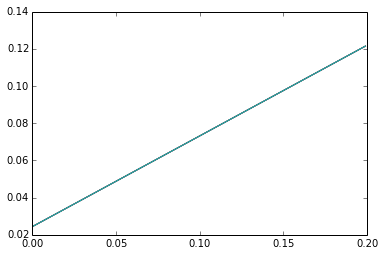

In [42]:
def alpha_0(t,T1,T2):
    if t>T:
        return np.nan
    num = 1
    denom =  1+ (T2-T1) * Forward(1,T1,T2)
    return 1- num/denom

def alpha_1(t,T1,T2):
    if t>T:
        return np.nan
    num = T2-T1
    denom =  1+ (T2-T1)  * Forward(1,T1,T2)
    return num/denom



def L(T1,T2):   
    mu = math.log(Forward(0,T1,T2)) - sigma*sigma*T1/2
    l = lognorm(s=sigma*sigma*T1, loc=0, scale=math.exp(mu))
    return l
   
T1=10
T2=T1+delta


plt.plot(np.arange(0,0.2,0.001), [L(T1,T2).pdf(s) for s in np.arange(0,0.2,0.001)],label="Q^C_T")
for vola in [0,0.1,0.2,0.4]:
    plt.plot(np.arange(0,0.2,0.001), [(alpha_0(0,T1,T2) +alpha_1(0,T1,T2)*s) 
                                    for s in np.arange(0,0.2,0.001)],label="")

    